# Heart Disease Analysis & Prediction Pipeline
**Track:** Microsoft Machine Learning Engineer (DEPI)


**Task:** Visualization, Preprocessing & Encoding


**Team Members:**
* Part 1: Zyad Atef & Khaled Abdo
* Part 2: Zyad Atef & Abdlrhman Hisham Ismail
* Part 3: Abdlrhman Hisham Ismail & Ahmed Labib
* Part 4: Ahmed Labib & Marwan Mohamed

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 Data Loading


In [49]:
df = pd.read_csv('Heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,NaN
2,No,NaN,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [50]:
# AgeCategory is ordinal categorical (stored as object), with a natural order from '18-24' to '80 or older'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16859 entries, 0 to 16858
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      16859 non-null  object 
 1   BMI               15255 non-null  float64
 2   Smoking           16859 non-null  object 
 3   AlcoholDrinking   16859 non-null  object 
 4   Stroke            16859 non-null  object 
 5   PhysicalHealth    16859 non-null  int64  
 6   MentalHealth      16859 non-null  int64  
 7   DiffWalking       16854 non-null  object 
 8   Sex               16859 non-null  object 
 9   AgeCategory       16859 non-null  object 
 10  Race              16859 non-null  object 
 11  Diabetic          16859 non-null  object 
 12  PhysicalActivity  16859 non-null  object 
 13  GenHealth         16859 non-null  object 
 14  SleepTime         16355 non-null  float64
 15  Asthma            16859 non-null  object 
 16  KidneyDisease     16859 non-null  object

In [51]:
df.shape

(16859, 18)

In [52]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,15255.000000,16859.000000,16859.000000,16355.000000
mean,28.380571,3.840085,3.867015,7.138490
std,6.410818,8.382590,7.962250,1.519619
min,12.400000,0.000000,0.000000,1.000000
25%,23.990000,0.000000,0.000000,6.000000
50%,27.390000,0.000000,0.000000,7.000000
75%,31.620000,2.000000,3.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


In [53]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

In [54]:
# Only Four features have missing values
df.isnull().sum()

,0
HeartDisease,0
BMI,1604
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,5
Sex,0
AgeCategory,0


### 1.1 Decision Questions Answers:
* **Features that look numeric but are categorical:**
    * *Answer:* `PhysicalHealth` and `MentalHealth` are stored as `int64` (numeric) but represent bounded discrete counts of days (0–30) with heavily zero-inflated distributions, so they may be better treated as categorical/ordinal. `SleepTime` is stored as `float64` but represents discrete whole hours in a narrow range, and could also benefit from categorical/ordinal treatment.
* **Features that look categorical but contain ordering (Ordinal):**
    * *Answer:*
        * `AgeCategory` (e.g., '55-59' is older than '18-24').
        * `GenHealth` (e.g., 'Excellent' > 'Very good' > 'Good'...).
* **Why is misclassifying a feature dangerous?**
    * *Answer:* Treating categorical data as numerical implies a mathematical relationship (e.g., 5 > 1) that might not exist, confusing the model. Treating ordinal data as nominal loses the valuable rank information.

# Part 2 EDA


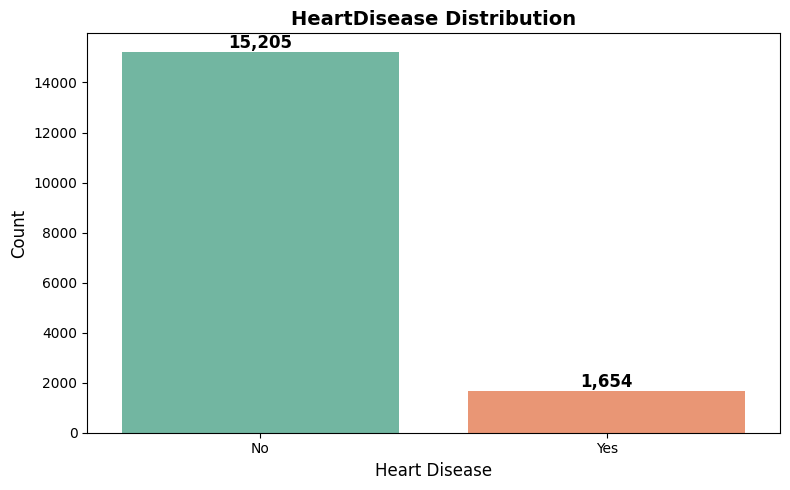

In [55]:
# Task 3: Target Variable Visualization
# Choice: Countplot — best for binary categorical target (shows exact counts clearly)

fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=df, hue='HeartDisease', palette=['#66c2a5', '#fc8d62'], ax=ax, legend=False)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('HeartDisease Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Heart Disease', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Target Variable Visualization:
* **Chart chosen:** Countplot
* **Why Countplot over Pie or Histogram?**
    * *Countplot* is ideal for binary categorical features — it shows the exact count for each class clearly on a readable axis.
    * *Pie chart* makes it harder to compare exact proportions when categories are very imbalanced (91% vs 9%).
    * *Histogram* is meant for continuous numerical data, not categorical — using it here would be incorrect.

### Target Variable Insights:
* **Is the dataset balanced or imbalanced?**
    * *Observation:* Yes, unbalanced, the percentage of No is much higher than the Yes.
* **How does this affect Model choice & Evaluation metrics?**
    * *Answer:* Accuracy will be misleading. We should use Precision, Recall, F1-Score, or ROC-AUC. We might need techniques like SMOTE or Class Weights.

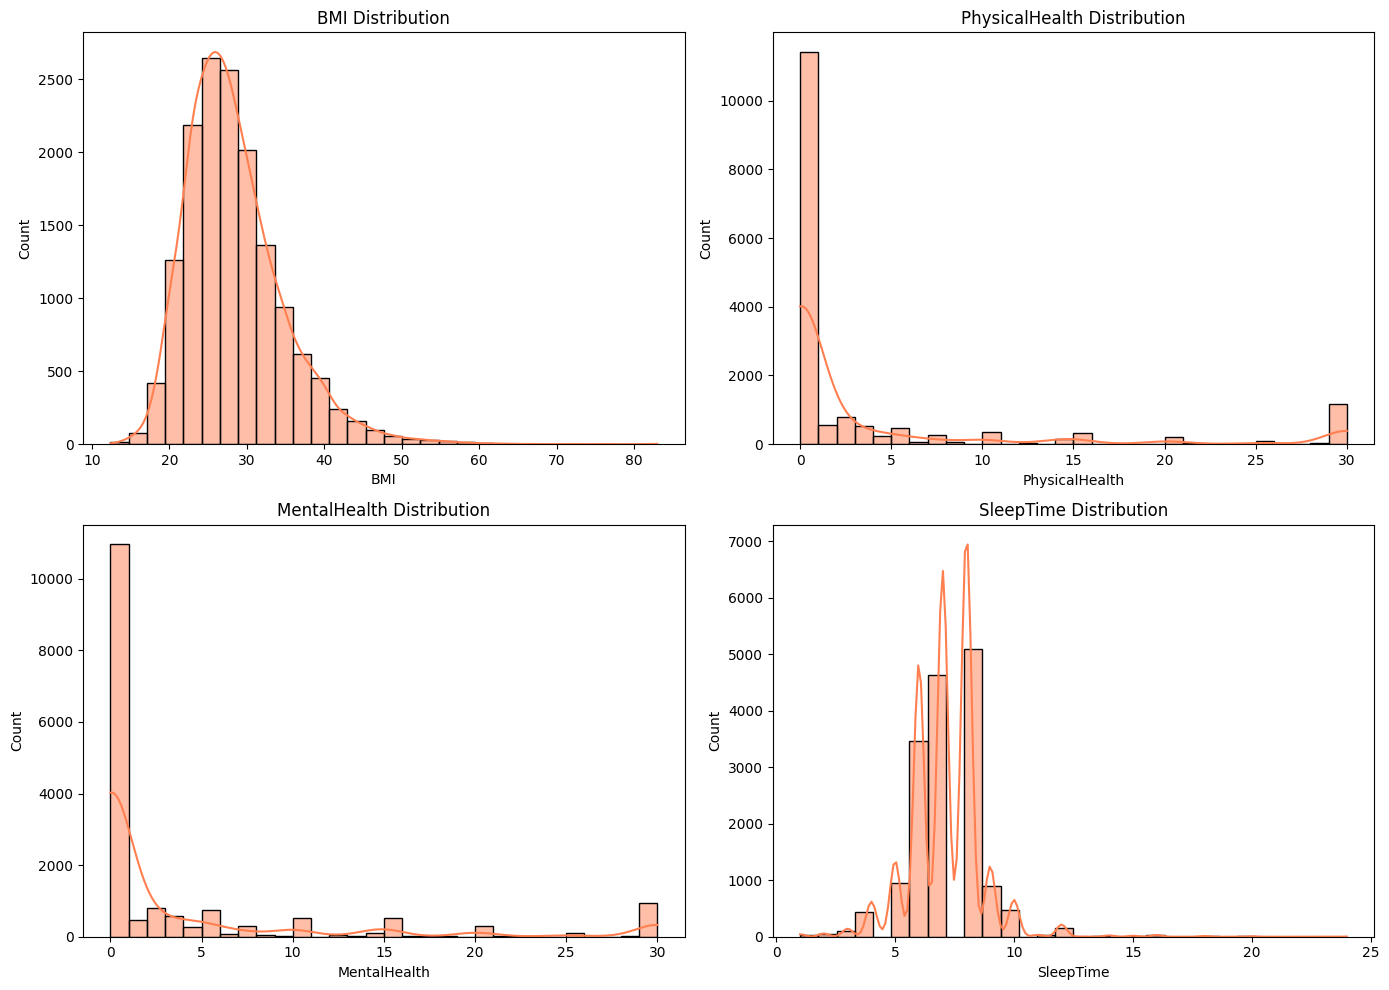

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, ax=axes[i], color='coral', kde=True)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

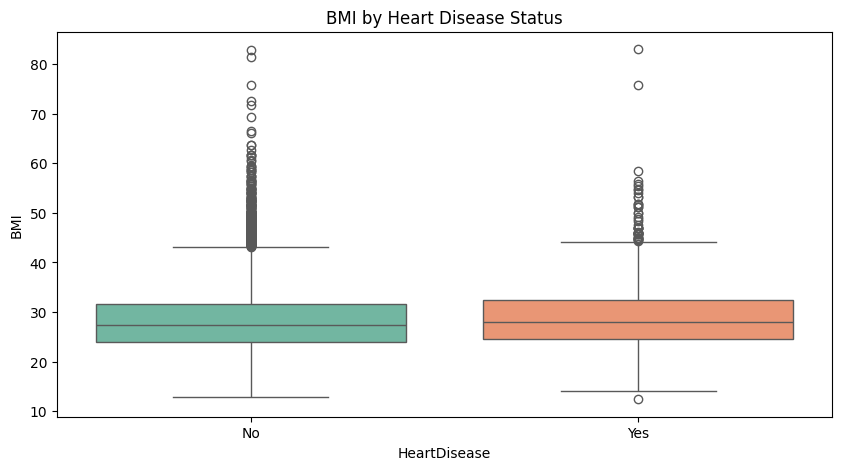

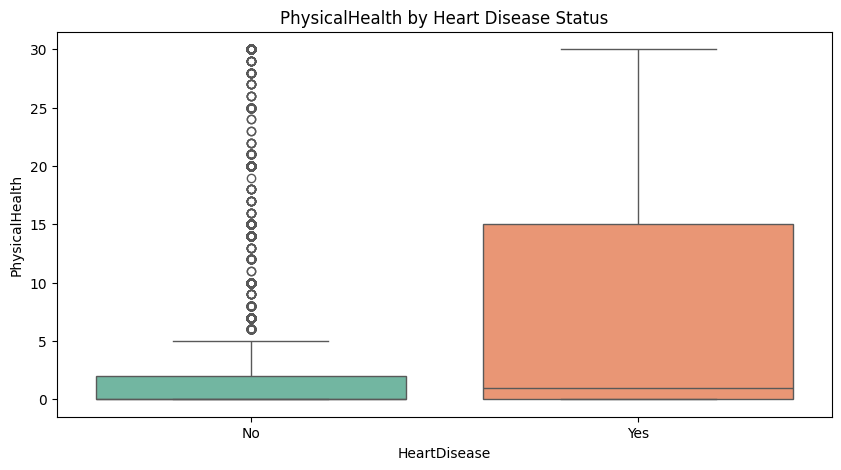

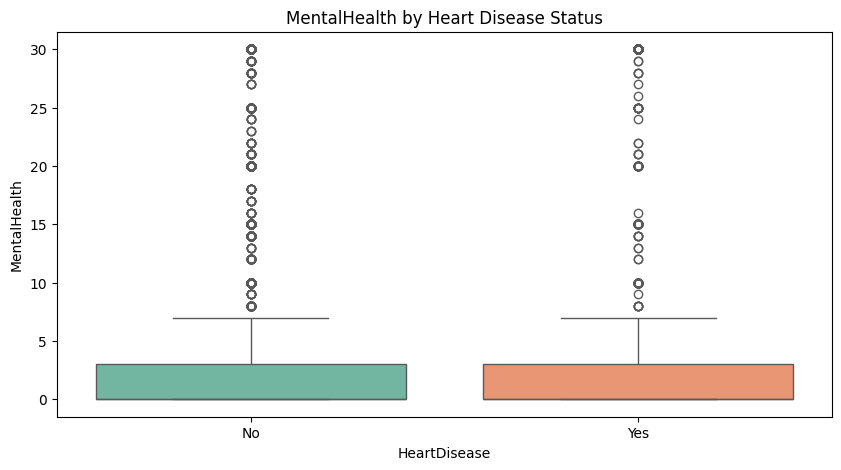

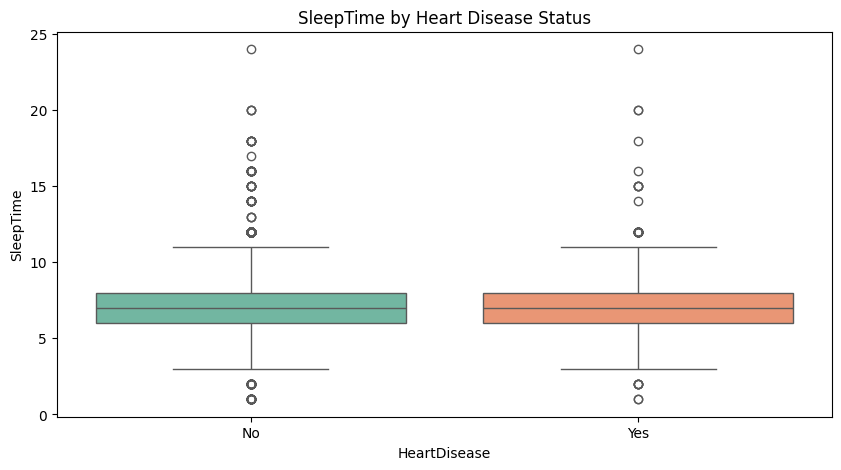

In [57]:
for col in numerical_features:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.boxplot(data=df, x='HeartDisease', y=col, hue='HeartDisease', ax=ax, palette='Set2', legend=False)
  ax.set_title(f'{col} by Heart Disease Status')
  plt.show()

* **Insights:** `BMI` and `PhysicalHealth` show significant outliers (see boxplots). Distributions are skewed, suggesting that RobustScaler or Log transformation might be needed.

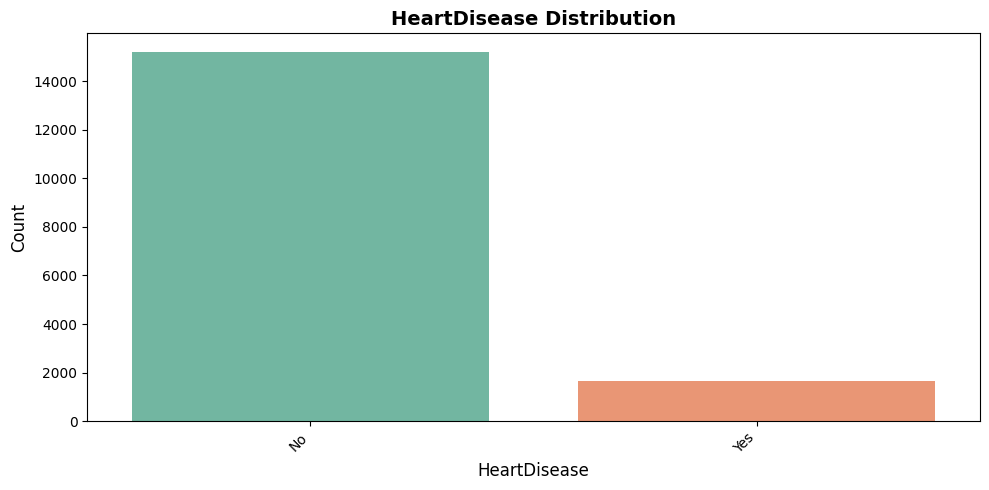

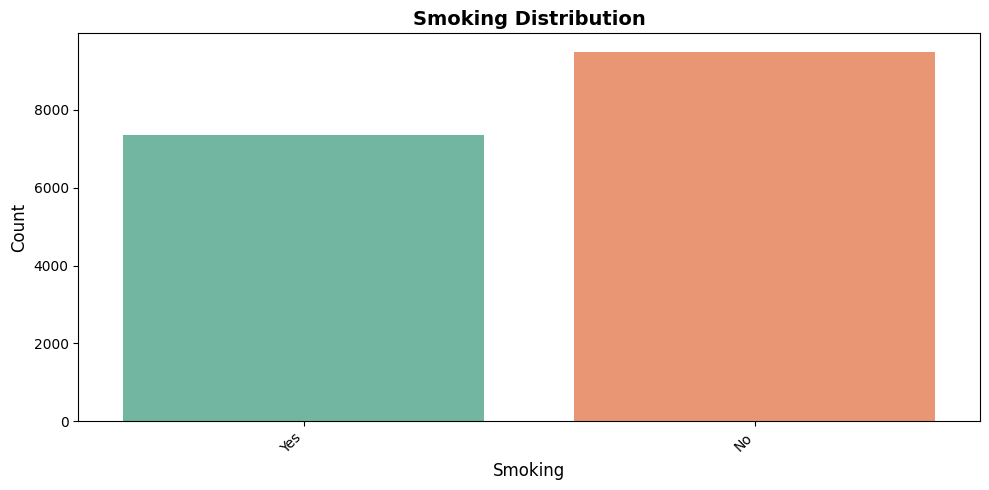

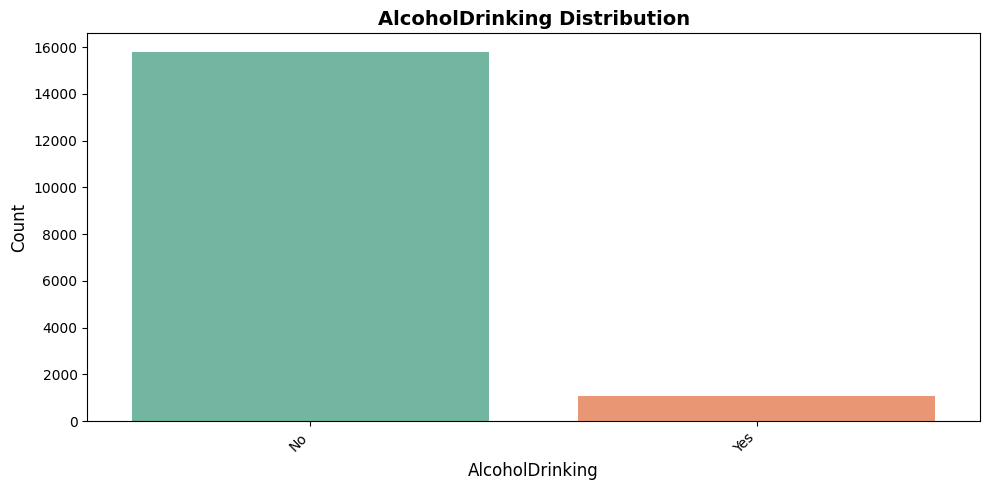

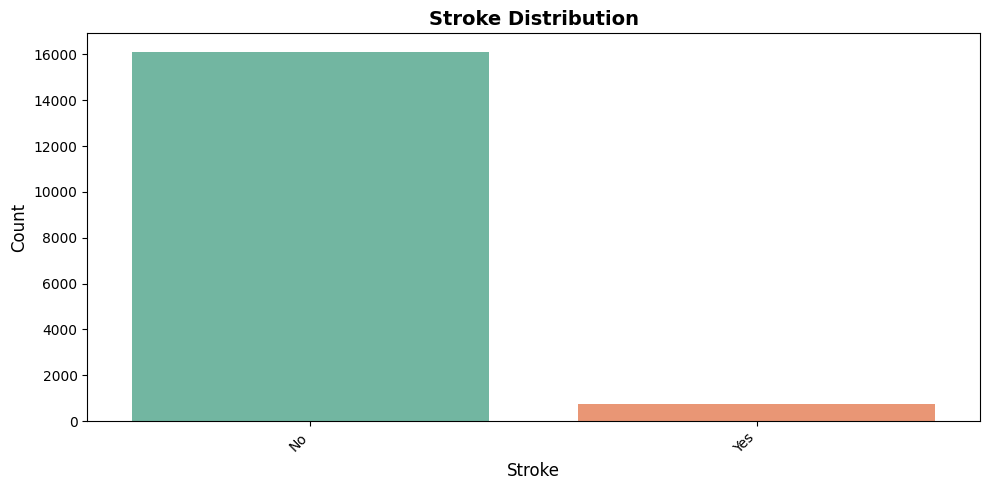

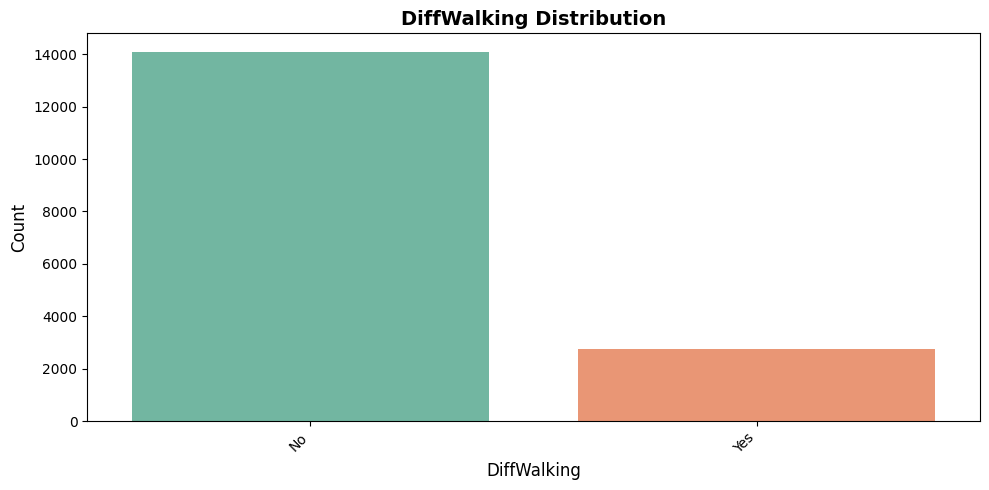

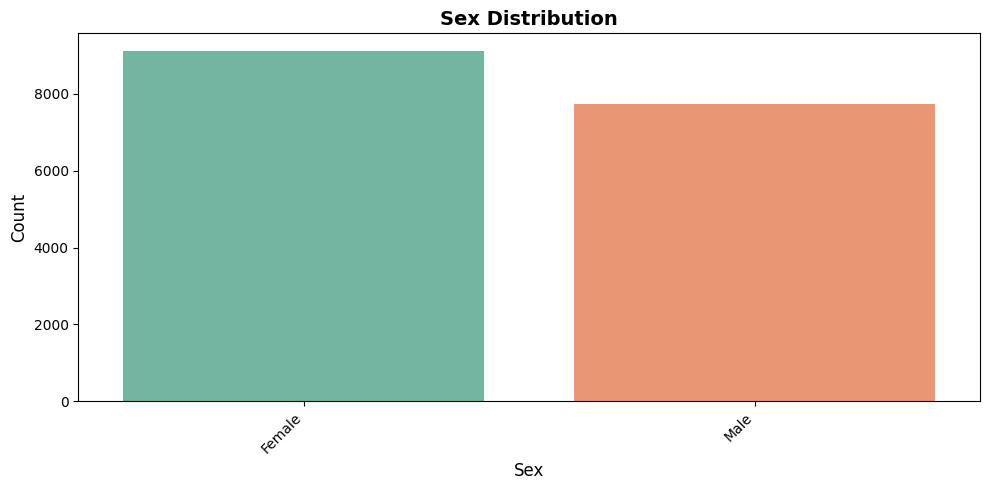

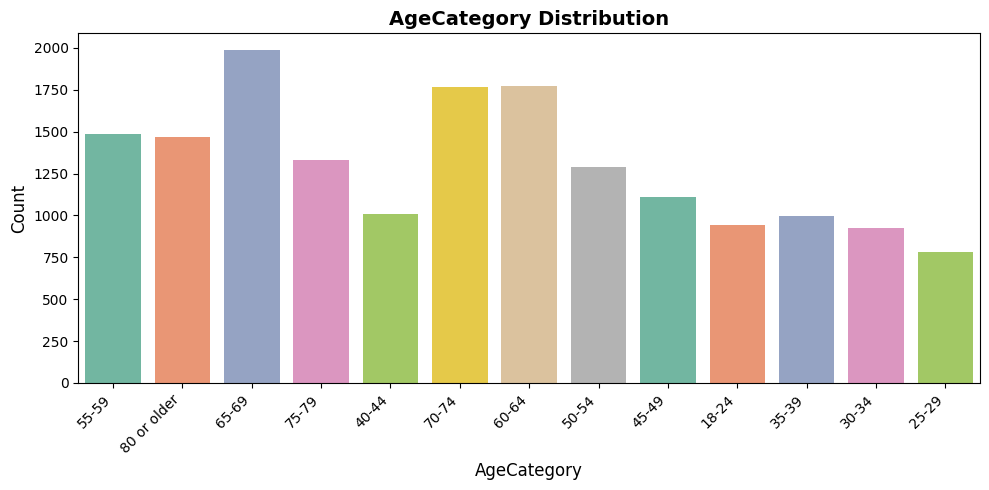

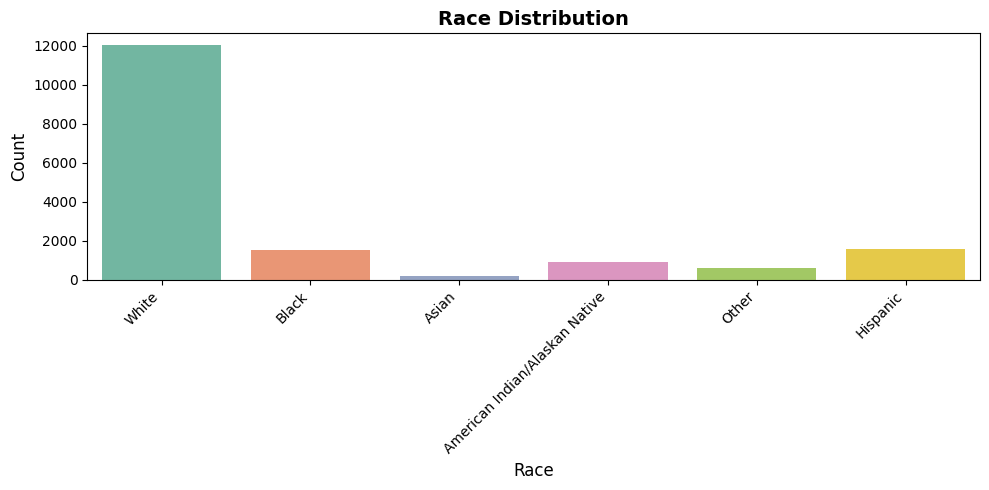

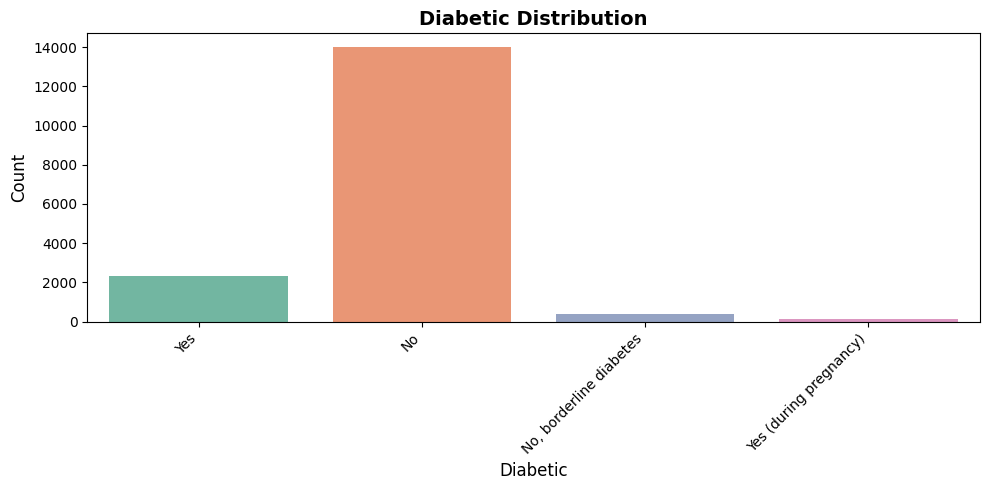

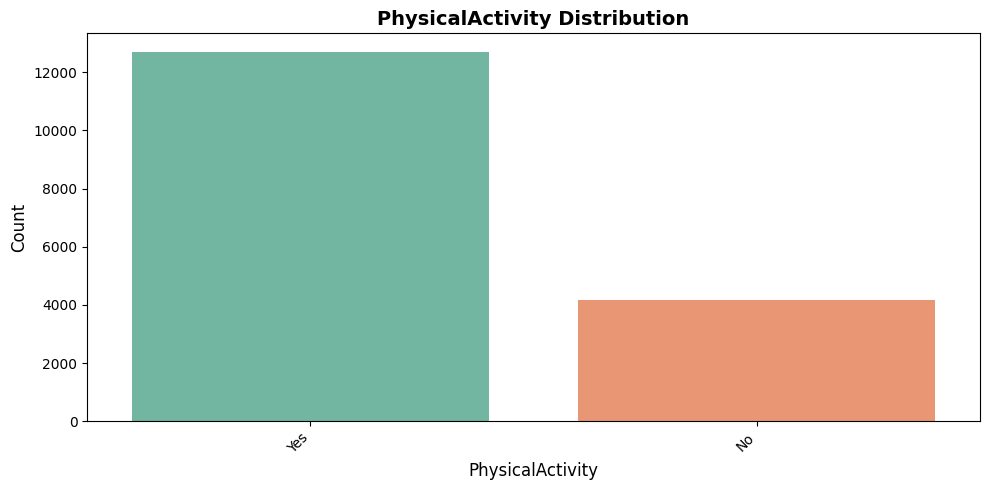

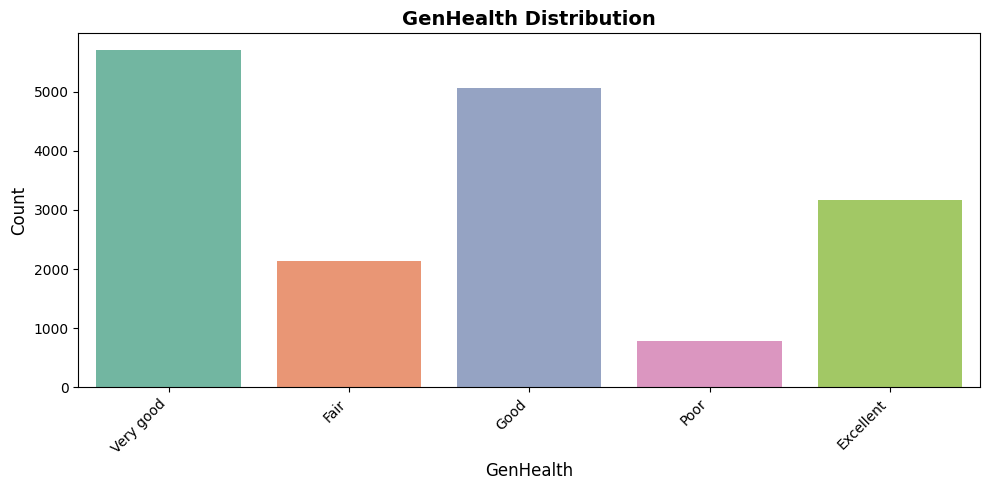

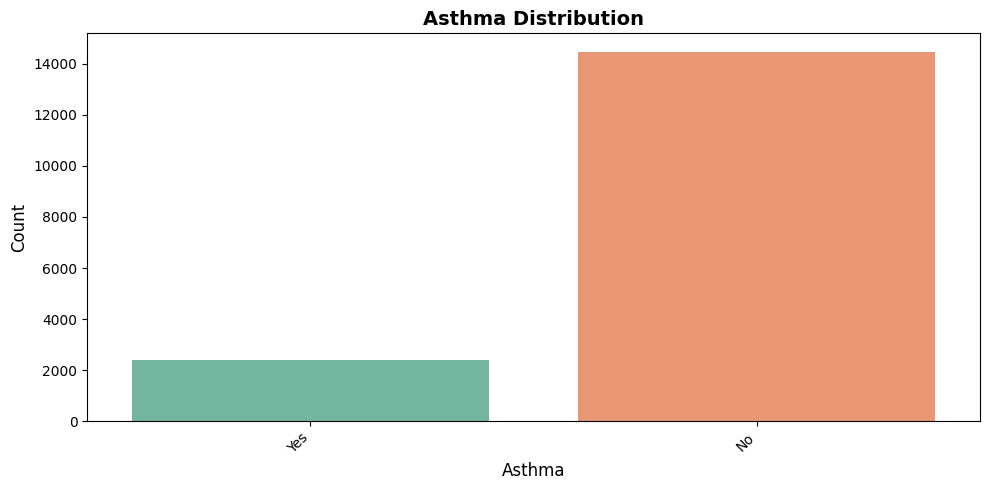

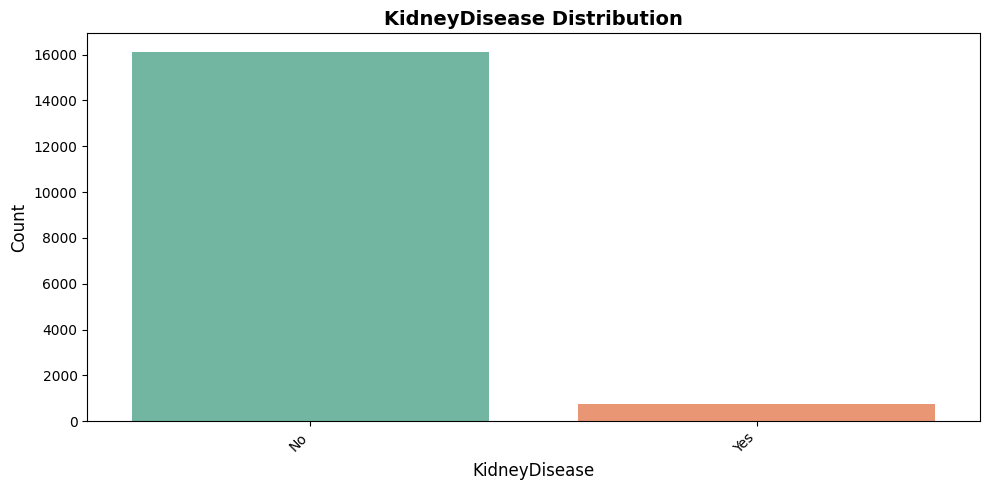

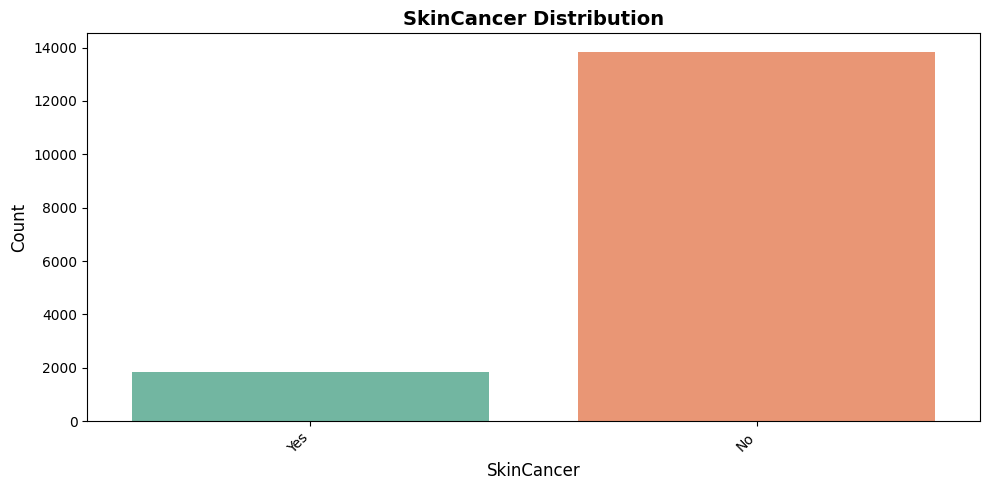

In [58]:
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Categorical Feature Distribution Insights:
* **HeartDisease**: Heavily imbalanced — 'No' dominates (~91%).
* **Smoking**: Fairly balanced between Yes/No.
* **Sex**: Fairly balanced between Male/Female.
* **AlcoholDrinking**: 'No' heavily dominates.
* **Stroke**: 'No' heavily dominates.
* **DiffWalking**: 'No' dominates.
* **Diabetic**: 'No' dominates, but 'Yes' has a notable portion.
* **PhysicalActivity**: 'Yes' dominates.
* **GenHealth**: 'Very good' and 'Good' dominate.
* **AgeCategory**: Middle-aged groups (50-64) have the most entries.
* **Race**: 'White' heavily dominates.
* **Asthma**: 'No' dominates.
* **KidneyDisease**: 'No' heavily dominates.
* **SkinCancer**: 'No' heavily dominates.

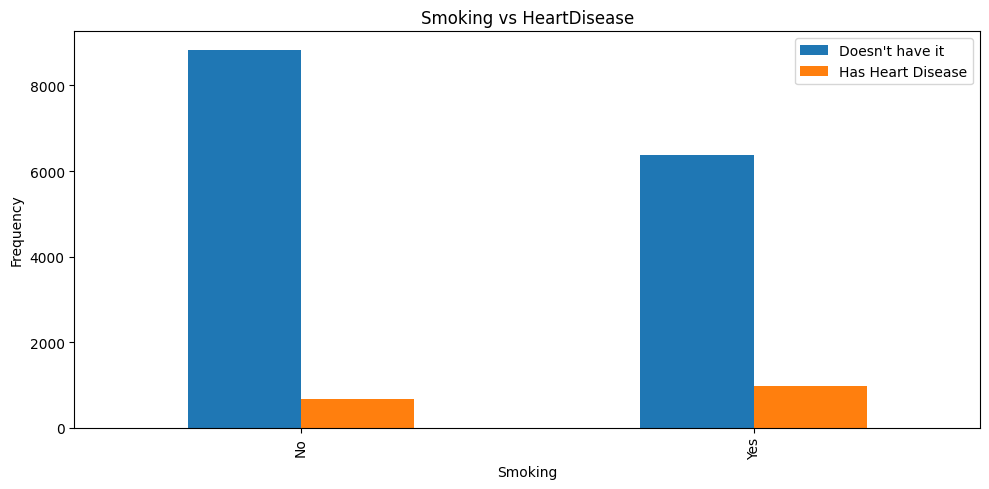

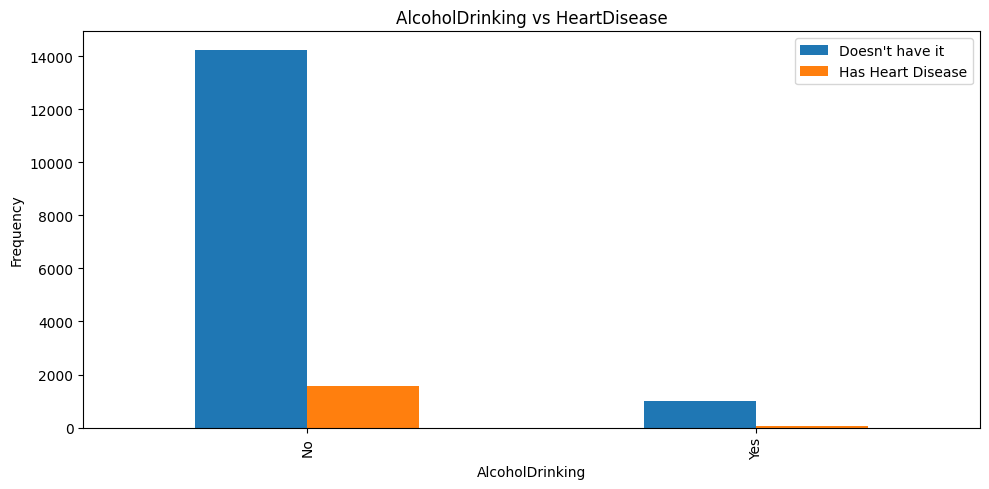

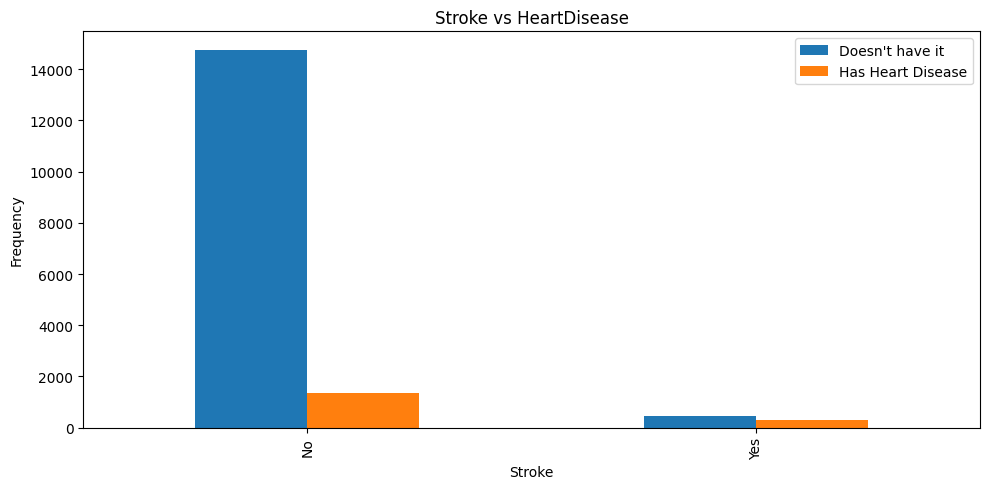

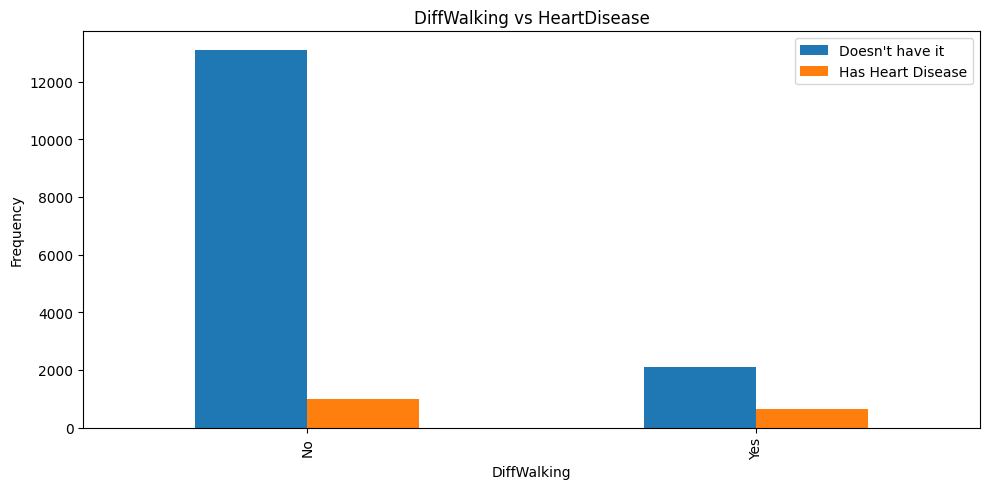

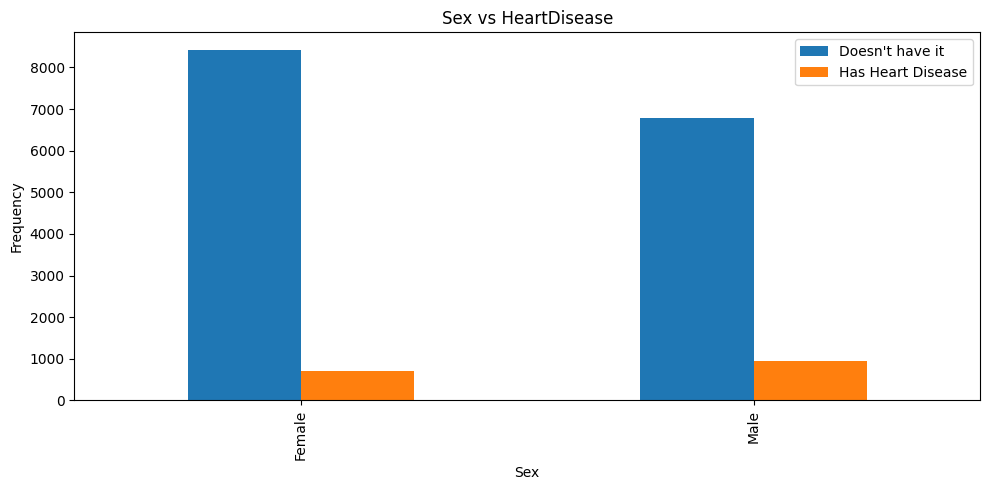

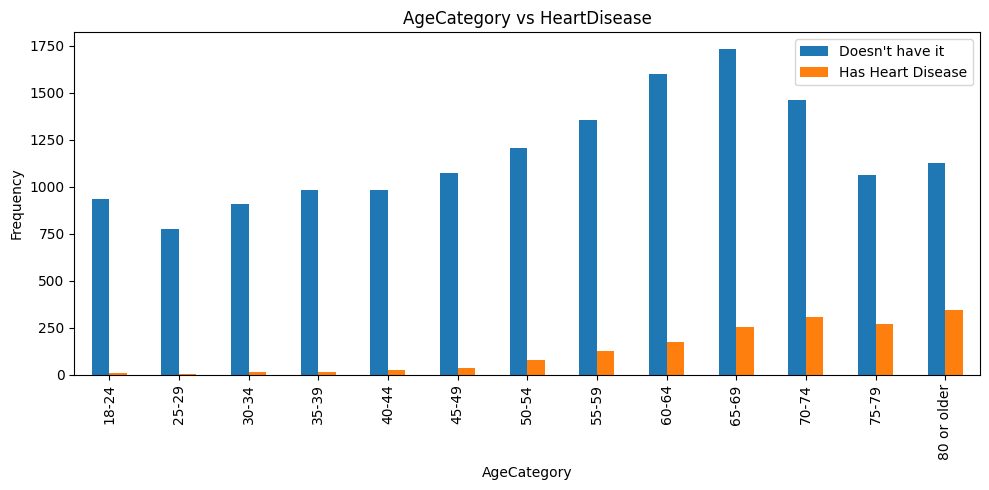

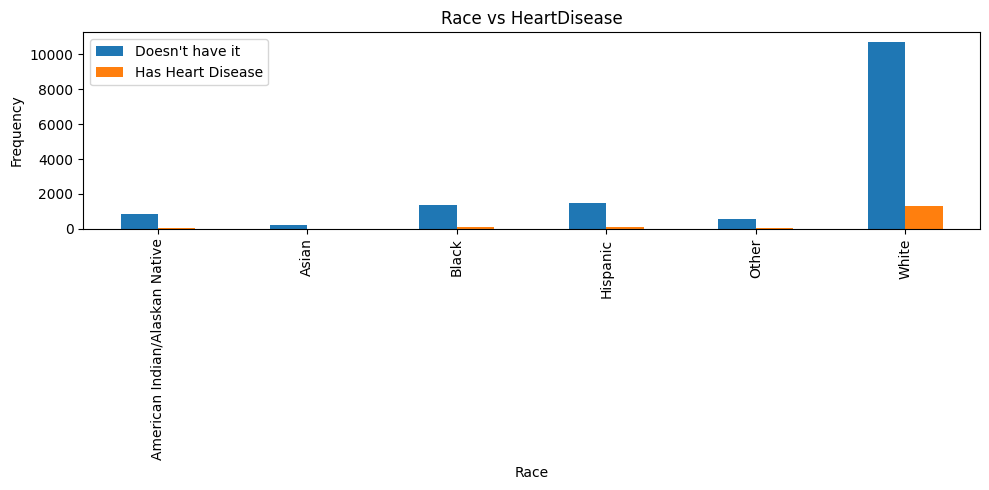

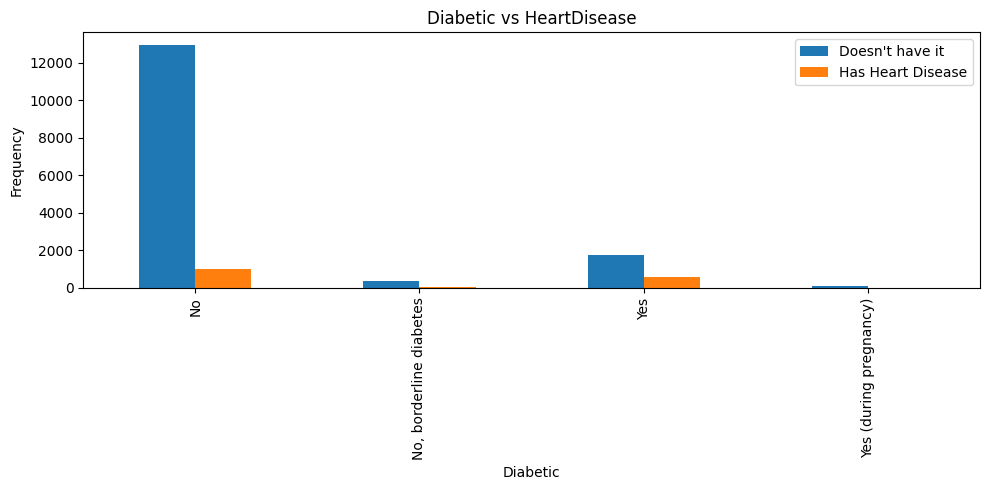

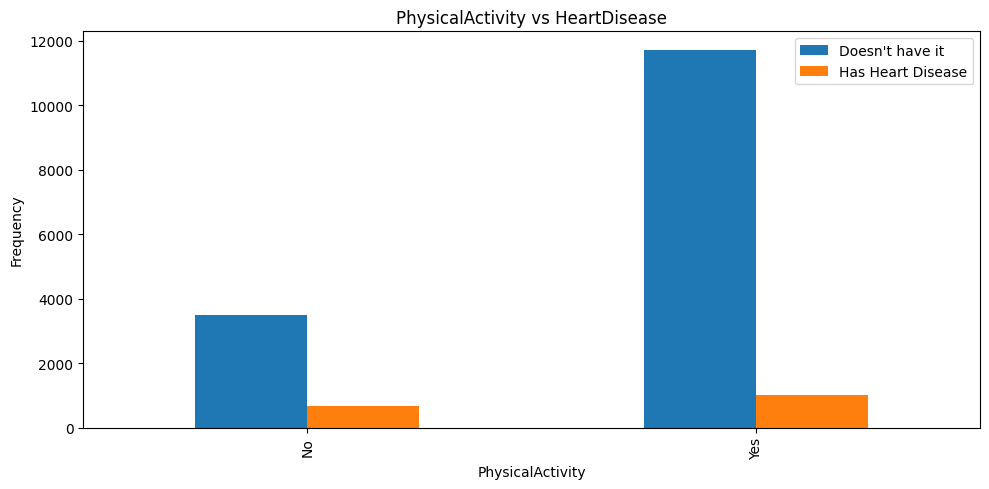

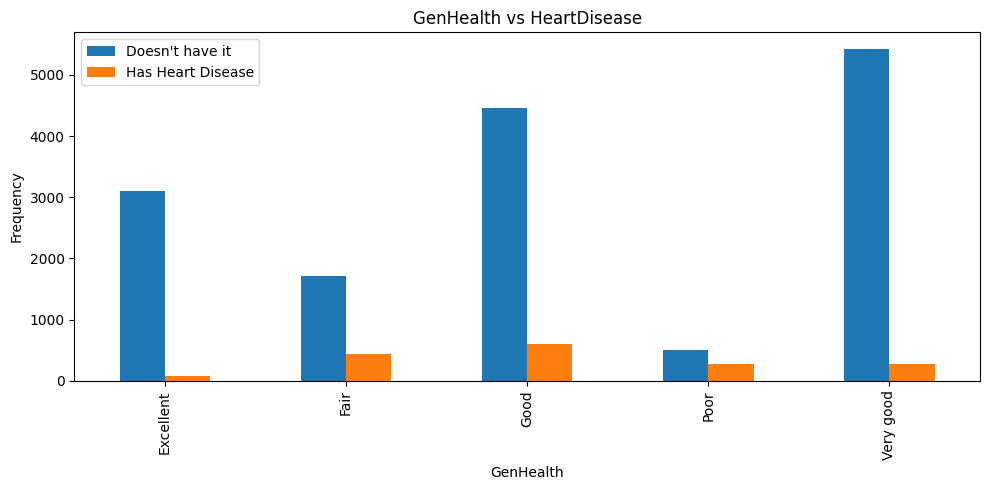

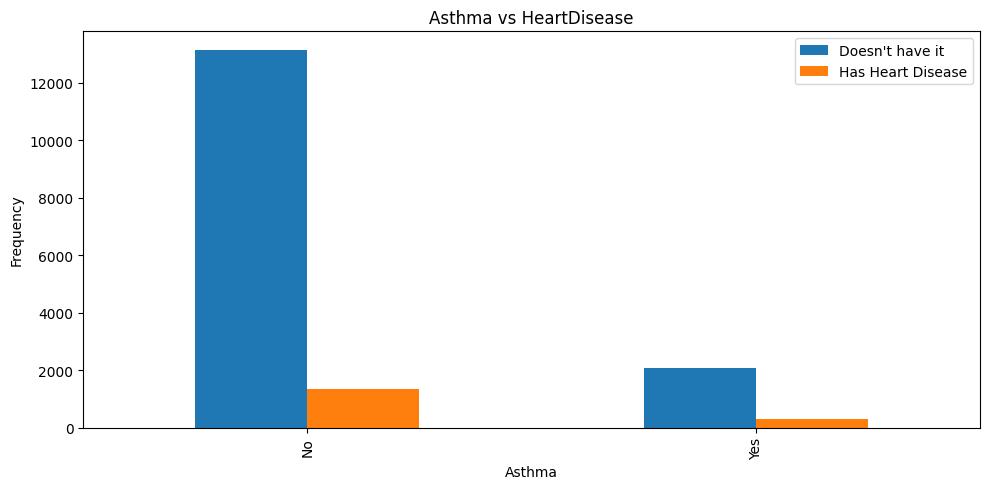

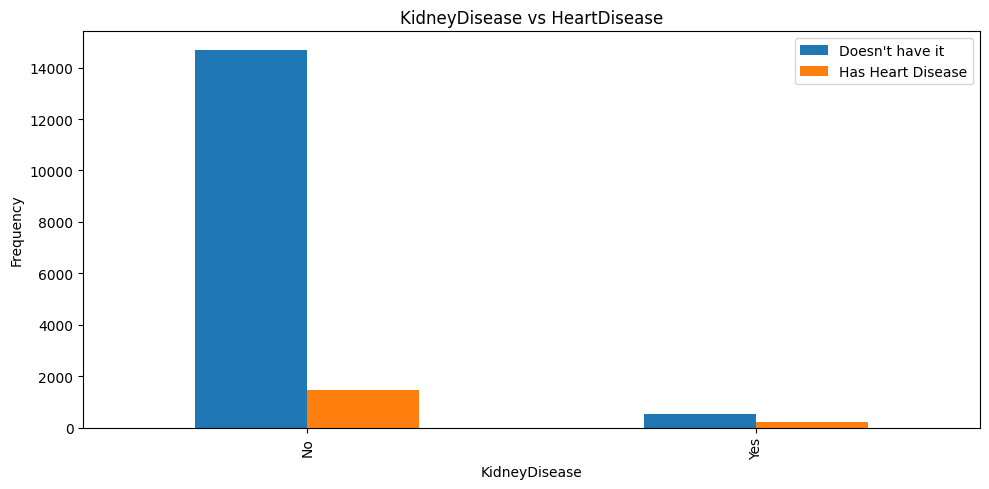

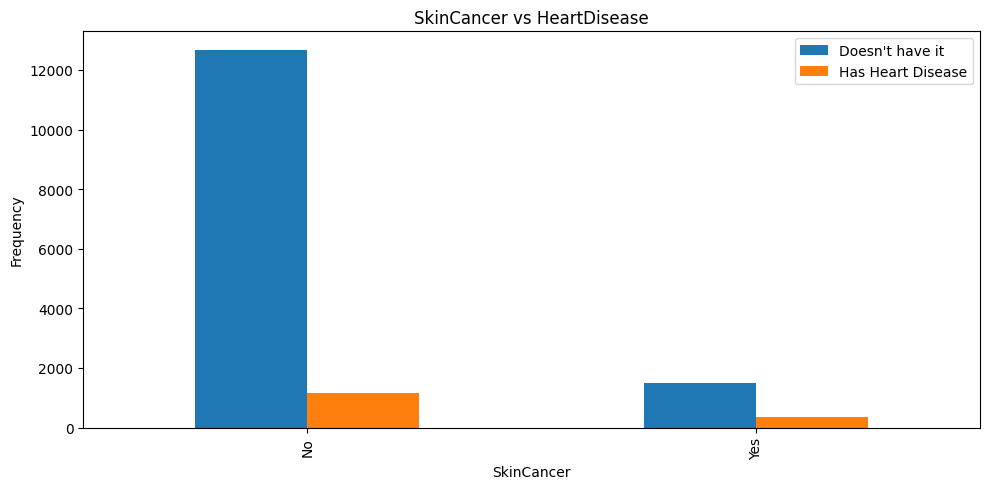

In [59]:
extaracted_cat_features = categorical_features[1:]

for col in extaracted_cat_features:
  plt.figure(figsize=(10,5))

  pd.crosstab(df[col], df['HeartDisease']).plot(
      kind='bar',
      ax=plt.gca()
  )
  plt.title(f'{col} vs HeartDisease')
  plt.ylabel('Frequency')
  plt.xlabel(col)
  plt.legend(["Doesn't have it", "Has Heart Disease"])
  plt.tight_layout()
  plt.show()

### 7. Feature Importance Hypothesis (Based on Viz)
| Feature | Visual Evidence | Decision |
|---|---|---|
| Smoking | Higher 'Yes' ratio in HeartDisease=Yes | Strong |
| AgeCategory | Older ages show significantly higher risk | Strong |
| GenHealth | Clear gradient — 'Poor' health strongly linked | Strong |
| DiffWalking | Higher proportion in HeartDisease=Yes | Strong |
| Diabetic | Higher proportion in HeartDisease=Yes | Medium |
| PhysicalHealth | Higher median in HeartDisease=Yes | Medium |
| BMI | Slight shift in median | Medium |
| Sex | Males show slightly higher risk | Medium |
| Stroke | Higher proportion in HeartDisease=Yes | Medium |
| KidneyDisease | Higher proportion in HeartDisease=Yes | Medium |
| PhysicalActivity | Slight difference | Weak |
| SleepTime | Overlapping distributions | Weak |
| MentalHealth | Slight difference, heavily overlapping | Weak |
| AlcoholDrinking | Minimal difference | Weak |
| Asthma | Minimal visible difference | Weak |
| SkinCancer | Minimal visible difference | Potentially removable |
| Race | Similar distributions across groups | Potentially removable |

### 8. Visualization Mistakes Check
* **Used histogram for categorical data?** — No.
* **Used pie chart for high-cardinality features?** — No.
* **Compared numerical features with target using bar charts?** — No, we used boxplots (correct approach).
* **Ignored class imbalance?** — No, we identified the imbalance in the target variable and noted its impact on model choice and evaluation metrics

# PART 3️⃣ — Splitting

decided to split first despite the assigment saying otherwise but we need to calculate the median on the train set to avoid leakage


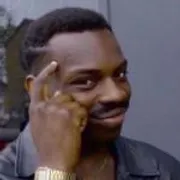                                      P.S: if this wasnt the right move you can blame me (zyad atef)

 Data Splitting – Class Distribution Challenge

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease'].map({'Yes':1, 'No':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PART 4️⃣ — Preprocessing & Encoding Decisions

### 9. Handling Missing Values

| Feature | Missing Count | % Missing | Strategy | Justification |
|---|---|---|---|---|
| `BMI` | 1,604 | 9.51% | **Median imputation** | BMI has significant outliers (see boxplots). Median is robust to outliers unlike mean. In a medical context, the "typical" BMI is more meaningful than the average pulled by extremes. |
| `DiffWalking` | 5 | 0.03% | **Mode imputation** | Binary categorical (Yes/No). Only 5 missing — mode ('No') is safe and preserves distribution. Removing rows also acceptable given tiny count. |
| `SleepTime` | 504 | 2.99% | **Median imputation** | SleepTime has outliers and slight skew. Median preserves the central tendency without being affected by extreme values (e.g., 24 hours). |
| `SkinCancer` | 1,164 | 6.90% | **Mode imputation** | Binary categorical (Yes/No). Mode ('No') preserves the dominant class distribution. Mean/median don't apply to categorical data. |

In [61]:
# # Task 9: Handle Missing Values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder


# #One-Hot Encoding for Nominal features (Diabetic, Race)
df = pd.get_dummies(df, columns=['Diabetic', 'Race'], drop_first=True)


numeric_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

ordinal_cols = ['AgeCategory', 'GenHealth']

nominal_cols = ['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']




age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
        categories=[age_order, health_order],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ])


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


print(f"Train shape: {X_train_preprocessed.shape}")
print(f"Test shape:  {X_test_preprocessed.shape}")

Train shape: (13487, 24)
Test shape:  (3372, 24)


### 10. Feature Type Classification

| Feature | Type | Justification |
|---|---|---|
| `HeartDisease` | Binary | Target variable — only Yes/No |
| `Smoking` | Binary | Only Yes/No |
| `AlcoholDrinking` | Binary | Only Yes/No |
| `Stroke` | Binary | Only Yes/No |
| `DiffWalking` | Binary | Only Yes/No |
| `Sex` | Binary | Only Male/Female |
| `PhysicalActivity` | Binary | Only Yes/No |
| `Asthma` | Binary | Only Yes/No |
| `KidneyDisease` | Binary | Only Yes/No |
| `SkinCancer` | Binary | Only Yes/No |
| `AgeCategory` | Ordinal categorical | Age ranges have a natural order (18-24 < 25-29 < ... < 80+) |
| `GenHealth` | Ordinal categorical | Health levels have a natural order (Poor < Fair < Good < Very good < Excellent) |
| `Diabetic` | Nominal categorical | 4 categories with no clear ordering: 'Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)' |
| `Race` | Nominal categorical | 6 race categories with no inherent order |
| `BMI` | Continuous numerical | Real-valued body mass index |
| `PhysicalHealth` | Continuous numerical | Days count (0-30), treated as continuous for modeling |
| `MentalHealth` | Continuous numerical | Days count (0-30), treated as continuous for modeling |
| `SleepTime` | Continuous numerical | Hours of sleep, narrow range but continuous |

### 11. Encoding Strategy

| Feature | Encoding | Why this? | Why NOT the others? |
|---|---|---|---|
| `Smoking` | Label Encoding (Yes=1, No=0) | Binary feature — only 2 values, so label encoding is natural and efficient. | One-Hot creates an unnecessary extra column for binary. Ordinal mapping doesn't apply. |
| `AlcoholDrinking` | Label Encoding | Binary (Yes/No). | Same as above. |
| `Stroke` | Label Encoding | Binary (Yes/No). | Same as above. |
| `DiffWalking` | Label Encoding | Binary (Yes/No). | Same as above. |
| `Sex` | Label Encoding (Male=1, Female=0) | Binary (2 categories). | Same as above. |
| `PhysicalActivity` | Label Encoding | Binary (Yes/No). | Same as above. |
| `Asthma` | Label Encoding | Binary (Yes/No). | Same as above. |
| `KidneyDisease` | Label Encoding | Binary (Yes/No). | Same as above. |
| `SkinCancer` | Label Encoding | Binary (Yes/No). | Same as above. |
| `HeartDisease` | Label Encoding (Yes=1, No=0) | Target variable — binary classification needs 0/1. | Same as above. |
| `AgeCategory` | Manual Ordinal Encoding | Has a natural order (18-24=0, 25-29=1, ..., 80+=12). Order must be preserved. | Label Encoding would assign random order. One-Hot would lose the ranking information and create 13 columns. |
| `GenHealth` | Manual Ordinal Encoding | Has a natural order (Poor=0, Fair=1, Good=2, Very good=3, Excellent=4). | Label Encoding assigns alphabetical order (wrong). One-Hot loses rank. |
| `Diabetic` | One-Hot Encoding | Nominal with 4 unordered categories. One-Hot preserves independence between categories. | Label/Ordinal Encoding would impose a fake numerical order (e.g., 'borderline'=2 > 'No'=1), misleading models. |
| `Race` | One-Hot Encoding | Nominal with 6 unordered categories. | Same risk as Diabetic — ordinal encoding would imply 'White' > 'Black' which is meaningless. |

In [63]:
# # Task 11: Apply Encoding

# # 1. Label Encoding for Binary features
# binary_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
#                'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']

# for col in binary_cols:
#     df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# # 2. Manual Ordinal Encoding for AgeCategory
# age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
#              '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
# df['AgeCategory'] = df['AgeCategory'].map({age: i for i, age in enumerate(age_order)})

# # 3. Manual Ordinal Encoding for GenHealth
# health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
# df['GenHealth'] = df['GenHealth'].map({h: i for i, h in enumerate(health_order)})

# # 4. One-Hot Encoding for Nominal features (Diabetic, Race)
# df = pd.get_dummies(df, columns=['Diabetic', 'Race'], drop_first=True)

# # Verify
# print(df.head())
# print(f'\nShape after encoding: {df.shape}')
# print(f'\nData types:\n{df.dtypes}')